In [28]:
import json
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

def readLogs(f1):
    zmapBench = {}
    with open(f1, "r") as fp:
        for l in fp:
            lot, cpu, time = l.split()
            if not lot in zmapBench:
                zmapBench[lot] = []
            zmapBench[lot].append([int(cpu), float(time)])
    return zmapBench

def draw(ax, data, lgTitle):
    lines=[]
    label= tuple(data.keys())
    for n in list(zmapBench.keys()):
        _ = ax.plot([ _[0] for _ in data[n] ],\
                 [ _[1] for _ in data[n] ],  \
                 '-o')
        lines.append(_[0])
    ax.set_xlabel("Threads number", fontsize='x-large')
    ax.set_ylabel("Computation time (sc)", fontsize='x-large')

    legend=ax.legend(lines, label, title=lgTitle, fontsize='x-large', title_fontsize='x-large',\
                     loc='best', bbox_to_anchor=(0.5, 0.5, 0.475, 0.475) )



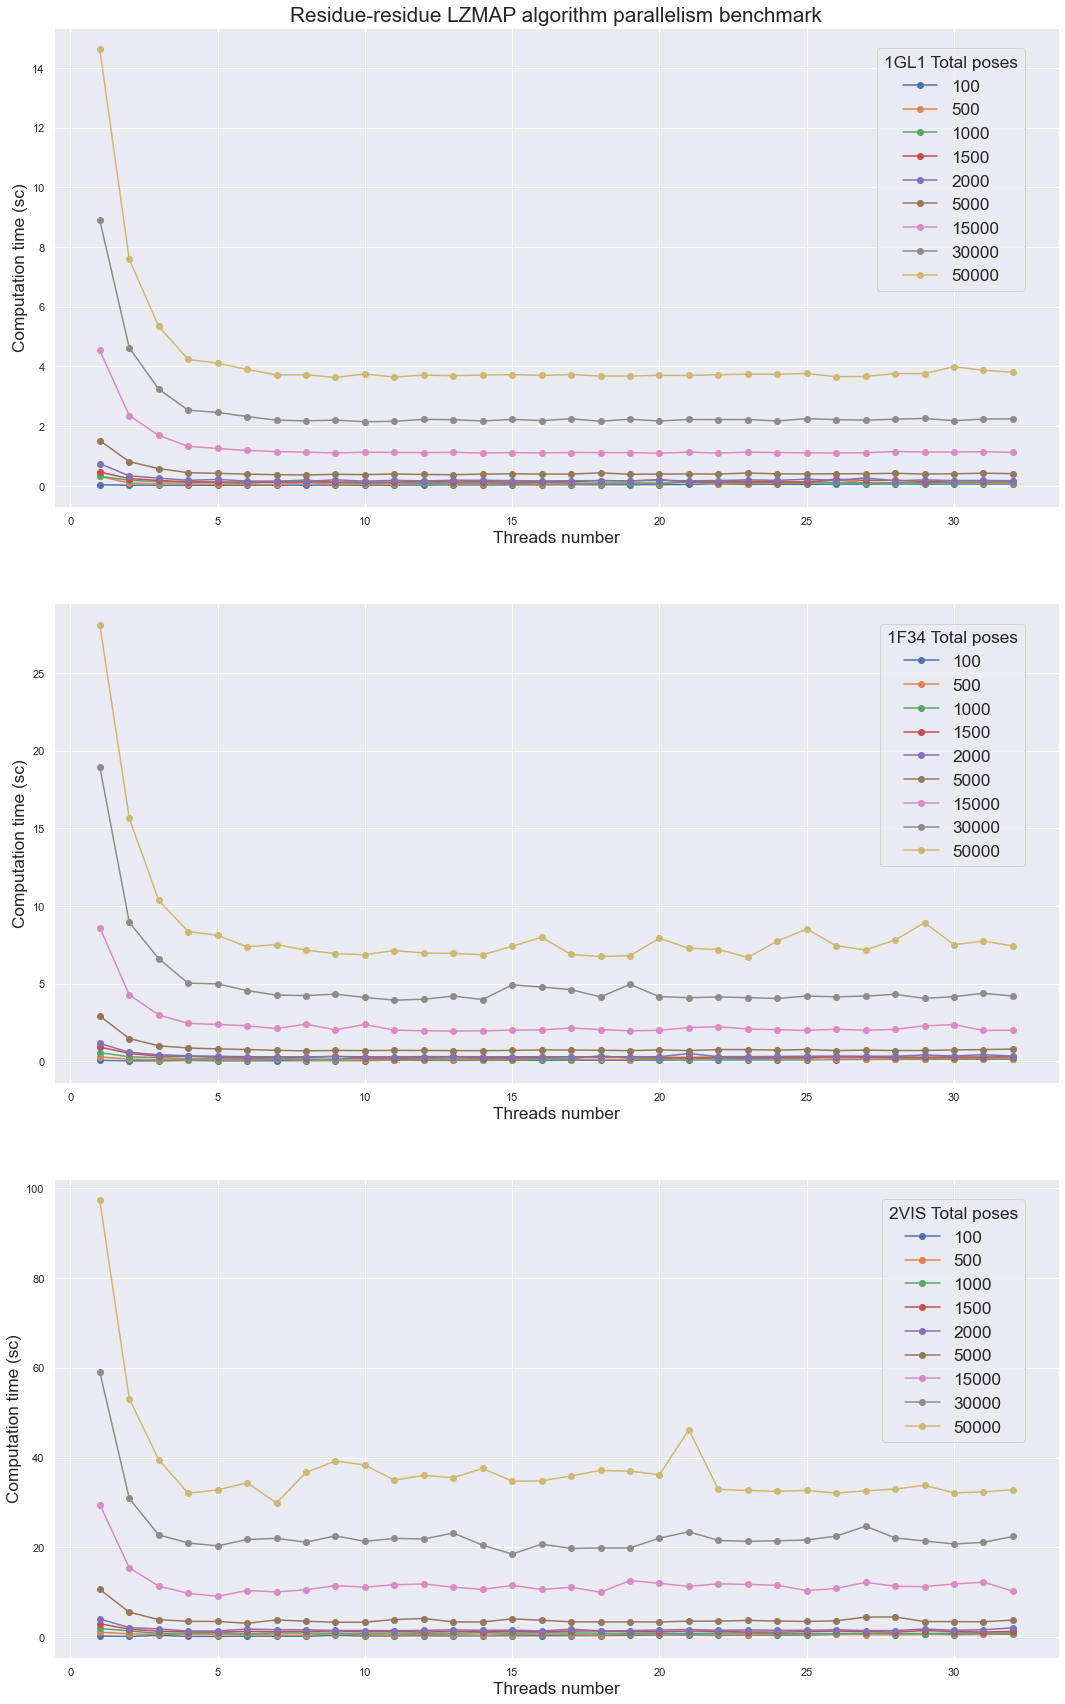

In [32]:
#titleFig=




fig, axs = plt.subplots(3, 1,figsize=[18, 30])
#fig.tight_layout()
axs[0].set_title("Residue-residue LZMAP algorithm parallelism benchmark", fontsize='xx-large')
for ID, ax in zip(["1GL1", "1F34", "2VIS"], axs):
    titleLgd = f"{ID} Total poses"
    fName    = f"/Users/guillaumelaunay/work/tmp/ccmap2/logs/lzmap_{ID}_benchmark.log"
    d        = readLogs(fName)
    draw(ax, d, titleLgd)

In [33]:
fig.savefig("LZMAP_benchmark_1.pdf", bbox_inches='tight')